In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(-5,5,200)
A = 2
B = 0.2
C = 0.1
y = A*x*x + B*x + C

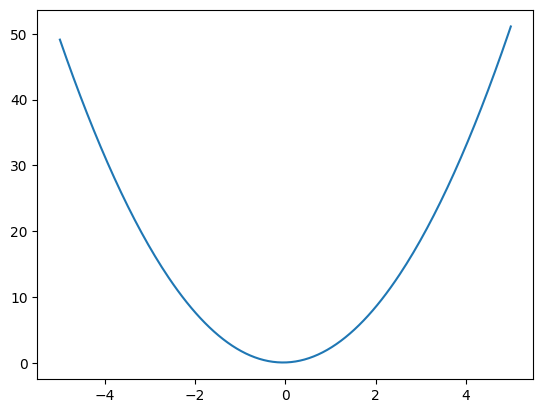

In [5]:
plt.plot(x,y)

In [6]:
min_x = -B/(2*A)
min_x

-0.05

## Experiment 1
With some synthetic data

In [7]:
import pandas as pd

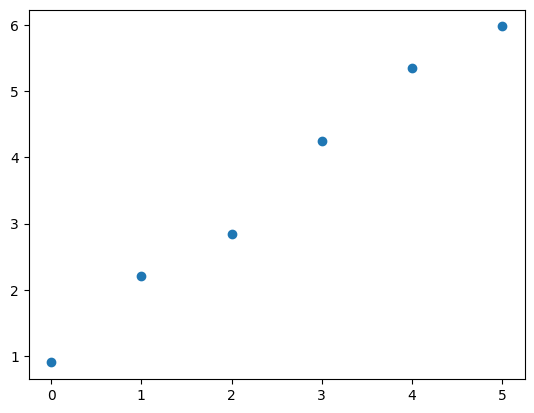

In [8]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0.9,2.2, 2.85, 4.25, 5.35, 5.98])
plt.scatter(x, y)

In [9]:
df = pd.DataFrame({"x":x, "observations (y)":y})
df

,x,observations (y)
0,0,0.90
1,1,2.20
2,2,2.85
3,3,4.25
4,4,5.35
5,5,5.98


#### Proove that MSE Loss function is Convex for both Parameters

$$ f(x,A,B) = A*x + B $$
$$ loss(A,B) = 1/N \sum{(y-f(x,A,B))^2}$$

In [11]:
def loss(x, true_y, predicted_a, predicted_b):
    predicted_y = predicted_a * x + predicted_b
    loss = np.mean( (predicted_y - true_y)**2  )
    return loss

Text(0, 0.5, 'Losses')

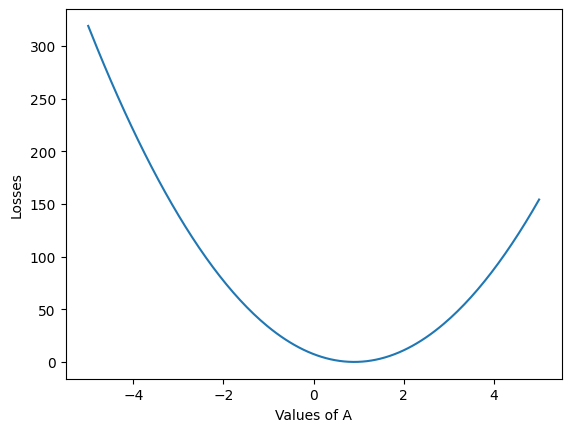

In [12]:
## Lets calculate loss for a range of A , fixing B
B = 1.5
potential_a = []
losses = []
for a in np.linspace(-5,5, 200):
    potential_a.append(a)
    losses.append(loss(x,y,a,B))

plt.plot(potential_a, losses)
plt.xlabel("Values of A")
plt.ylabel("Losses")



Text(0, 0.5, 'Losses')

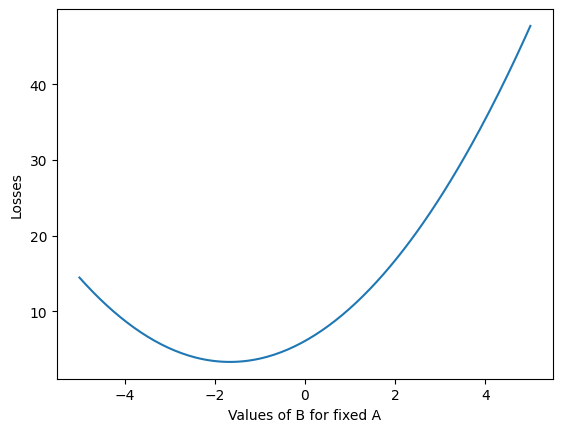

In [13]:
## Lets calculate loss for a range of B , fixing A
A = 2.1
potential_b = []
losses = []
for b in np.linspace(-5,5, 200):
    potential_b.append(b)
    losses.append(loss(x,y,A,b))

plt.plot(potential_b, losses)
plt.xlabel("Values of B for fixed A")
plt.ylabel("Losses")

In [14]:
## Lets optimize

In [ ]:
A = 6.0
B = -2.0
alpha  = 0.1
n = len(x)

prev_loss = 0

while(True):
    current_loss = loss(x,y,A,B)
    print(f"A = {A} , B= {B} Loss: {current_loss}")
    if abs(prev_loss - current_loss) < 0.000001:
        print("We have converged")
        break
    prev_loss = current_loss
    pred_y = A*x + B
    dl_da = (2.0/n)* np.mean((pred_y - y) *x)
    dl_db = (2.0/n)* np.mean((pred_y - y))
    A = A - alpha * dl_da
    B = B - alpha * dl_db
    

A = 6.0 , B= -2.0 Loss: 160.48965
A = 4.733055555555556 , B= -2.3137222222222222 Loss: 75.0750820159465
A = 3.879376543209877 , B= -2.5114083333333332 Loss: 36.56747697059669
A = 3.303017738340192 , B= -2.631364989711934 Loss: 19.1778828234673
A = 2.9127649563233504 , B= -2.699293190472108 Loss: 11.296412427881085
A = 2.647416763319447 , B= -2.732436052705539 Loss: 7.6964180150692085
A = 2.465909090030633 , B= -2.7423618034475306 Loss: 6.024907334188721
A = 2.340689240586345 , B= -2.736831056390721 Loss: 5.222572566680948
A = 2.253270116217522 , B= -2.721049680115448 Loss: 4.812506953121225
A = 2.1912472762717887 , B= -2.698509422685282 Loss: 4.579993842488038
A = 2.14629750485696 , B= -2.671551937173977 Loss: 4.428351690478536
A = 2.1128359286929426 , B= -2.64174722022848 Loss: 4.314037260266236
A = 2.087114996611361 , B= -2.6101475291674983 Loss: 4.217429882047971
A = 2.066619930632959 , B= -2.577457750135084 Loss: 4.129678882371928
A = 2.049663097673034 , B= -2.5441497082388835 Loss

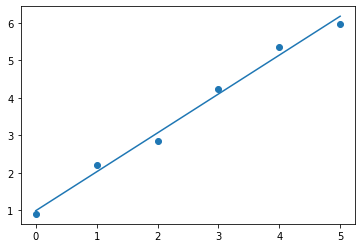

In [ ]:
y_pred = A*x + B

plt.scatter(x, y)
plt.plot(x,y_pred)

### Linear ALgebra : Least Squares 

In [ ]:
X = np.hstack([np.ones(n).reshape((n,1)), x.reshape((n,1))])
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [ ]:
w = np.linalg.inv( X.T @ X ) @ X.T @ y
w

array([0.99904762, 1.03571429])